<a href="https://colab.research.google.com/github/namitasaurus/Iris_Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [81]:
data = pd.read_csv('iris.zip')
df = pd.DataFrame(data)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Understanding the dataset

In [82]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [84]:
data['species'].value_counts()
#we have 50 of each species, so this tells us we've an unbiased dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [85]:
 data.groupby('species').mean()
 #this helps us group the specifics of the target variable

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Data visualization

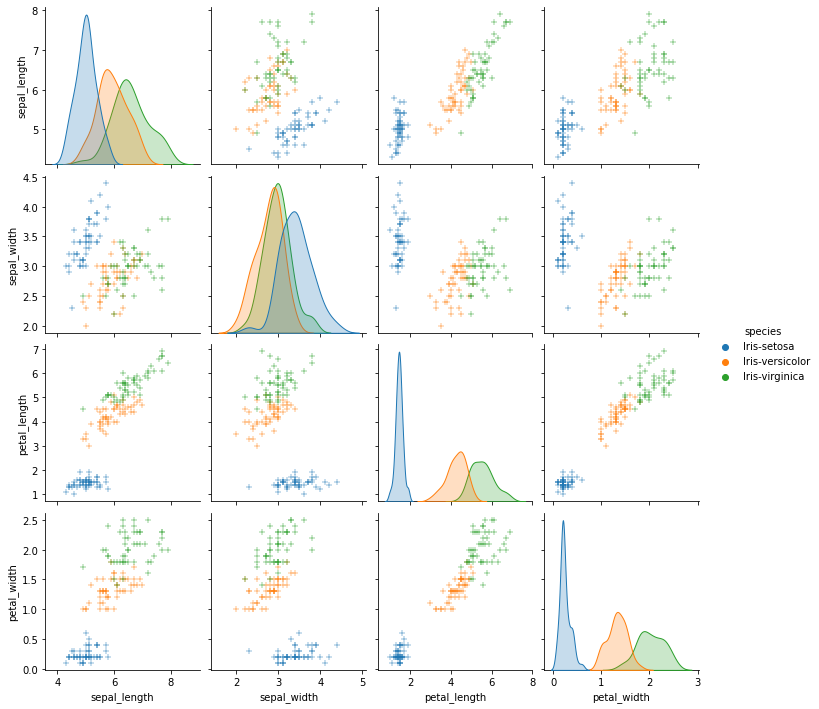

In [87]:
graphs = sns.pairplot(data, hue='species', markers='+')
plt.show()

Training and Testing

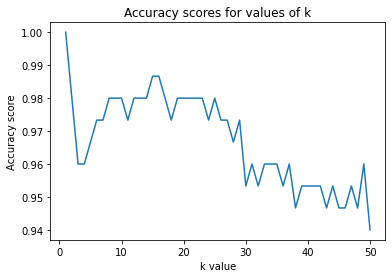

In [88]:
#here, I'll be using KNN since it is simple to use and works best with classification
#looking for values of k and plotting a graph to see which provides the best accuracy score
x = data.drop(['species'], axis=1)
y = data['species']
range_k = list(range(1, 51))
score = []
for k in range_k:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x, y)
  y_pred = knn.predict(x)
  score.append(metrics.accuracy_score(y, y_pred))

plt.plot(range_k, score)
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.title('Accuracy scores for values of k')
plt.show()

In [94]:
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
final_score = metrics.accuracy_score(y, y_pred)
print('accuracy is', final_score*100, '%')
#We get the most accuracy with k = 1

accuracy is 97.33333333333334 %


In [90]:
x = data.drop(['species'], axis=1)
y = data['species']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 6)

In [91]:
knn.predict([[5, 2.9, 1, 0.2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)